In [1]:
#Open command prompt (Windows Power Shell) and type the following -
#pip install pandas-profiling
import numpy as np
import pandas as pd
import pandas_profiling 

#To find version of pandas
pd.__version__

#Type the following in Windows Powershell to upgrade to latest version
#conda update pandas

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25,10
import matplotlib.pyplot as plt

pd.set_option('display.precision',2)
pd.set_option('display.float_format','{:,}'.format)

#pd.reset_option('all')
#http://chrisalbon.com/ #Link for Pandas operations

In [2]:
#Importing train and test datasets
data_path = "C:/Users/Sharath P Dandamudi/Desktop/Dataset/"
train_file = data_path + "train.xlsx"
test_file = data_path +  "test.xlsx"

train1 = pd.read_excel(train_file,header=0) 
test1 = pd.read_excel(test_file,header=0) 

In [3]:
#To avoid rerunning the codes to import datsets if overwritten
train=train1
test=test1

In [4]:
#Checking the dimensions of train and test datasets
print train.shape,test.shape

(87020, 26) (37717, 24)


In [5]:
#Checking the data types in train dataset
#train.columns
train.dtypes

ID                               object
Gender                           object
City                             object
Monthly_Income                    int64
DOB                      datetime64[ns]
Lead_Creation_Date       datetime64[ns]
Loan_Amount_Applied             float64
Loan_Tenure_Applied             float64
Existing_EMI                    float64
Employer_Name                    object
Salary_Account                   object
Mobile_Verified                  object
Var5                              int64
Var1                             object
Loan_Amount_Submitted           float64
Loan_Tenure_Submitted           float64
Interest_Rate                   float64
Processing_Fee                  float64
EMI_Loan_Submitted              float64
Filled_Form                      object
Device_Type                      object
Var2                             object
Source                           object
Var4                              int64
LoggedIn                          int64


In [6]:
#Combine train and test into a dataset
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(124737, 27)

In [7]:
#EDA 
pfr = pandas_profiling.ProfileReport(data)
output_file = data_path + "eda_output.html"
pfr.to_file(output_file) 

In [8]:
#Computing missing value proportion for all variables in the dataset
#data.apply(lambda x: round(float(sum(x.isnull()))/len(x) * 100))
miss_prop_data=data.apply(lambda x: round(float(sum(x.isnull()))/len(x) * 100))
print miss_prop_data

City                     1.0
DOB                      0.0
Device_Type              0.0
Disbursed               30.0
EMI_Loan_Submitted      68.0
Employer_Name            0.0
Existing_EMI             0.0
Filled_Form              0.0
Gender                   0.0
ID                       0.0
Interest_Rate           68.0
Lead_Creation_Date       0.0
Loan_Amount_Applied      0.0
Loan_Amount_Submitted   40.0
Loan_Tenure_Applied      0.0
Loan_Tenure_Submitted   40.0
LoggedIn                30.0
Mobile_Verified          0.0
Monthly_Income           0.0
Processing_Fee          68.0
Salary_Account          13.0
Source                   0.0
Var1                     0.0
Var2                     0.0
Var4                     0.0
Var5                     0.0
source                   0.0
dtype: float64


In [9]:
#Creating a list of categorical and continuous variables in data
cat_columns = data.select_dtypes(['object']).columns
num_columns = data.select_dtypes(['float64','int64']).columns
print cat_columns
print num_columns

Index([           u'City',     u'Device_Type',   u'Employer_Name',
           u'Filled_Form',          u'Gender',              u'ID',
       u'Mobile_Verified',  u'Salary_Account',          u'Source',
                  u'Var1',            u'Var2',          u'source'],
      dtype='object')
Index([u'Disbursed', u'EMI_Loan_Submitted', u'Existing_EMI', u'Interest_Rate',
       u'Loan_Amount_Applied', u'Loan_Amount_Submitted',
       u'Loan_Tenure_Applied', u'Loan_Tenure_Submitted', u'LoggedIn',
       u'Monthly_Income', u'Processing_Fee', u'Var4', u'Var5'],
      dtype='object')


In [10]:
#Computing frequency distribution for all categorical variables in data
for v in cat_columns:
    print '\n"%s"'%v
    print 'Frequency count for categorical variable "%s"'%v
    print data[v].value_counts()


"City"
Frequency count for categorical variable "City"
Delhi                  17936
Bengaluru              15522
Mumbai                 15425
Hyderabad              10410
Chennai                 9895
Pune                    7427
Kolkata                 4282
Ahmedabad               2528
Jaipur                  1892
Gurgaon                 1743
Coimbatore              1659
Thane                   1306
Chandigarh              1266
Surat                   1149
Visakhapatnam           1080
Indore                  1051
Vadodara                 893
Nagpur                   879
Lucknow                  813
Ghaziabad                795
Bhopal                   735
Kochi                    692
Patna                    675
Faridabad                651
Noida                    549
Madurai                  534
Gautam Buddha Nagar      485
Dehradun                 444
Raipur                   430
Bhubaneswar              407
                       ...  
Sawai Madhopur             1
SOMNATH JUNAGADH

In [12]:
#Computing # of unique categories per class - Not required as html o/p file already provides this info
for v in cat_columns:
    print '\n"%s"'%v
    print 'Unique count for categorical variable "%s"'%v
    print len(data[v].unique())


"City"
Unique count for categorical variable "City"
724

"Device_Type"
Unique count for categorical variable "Device_Type"
2

"Employer_Name"
Unique count for categorical variable "Employer_Name"
57194

"Filled_Form"
Unique count for categorical variable "Filled_Form"
2

"Gender"
Unique count for categorical variable "Gender"
2

"ID"
Unique count for categorical variable "ID"
124737

"Mobile_Verified"
Unique count for categorical variable "Mobile_Verified"
2

"Salary_Account"
Unique count for categorical variable "Salary_Account"
59

"Source"
Unique count for categorical variable "Source"
34

"Var1"
Unique count for categorical variable "Var1"
19

"Var2"
Unique count for categorical variable "Var2"
7

"source"
Unique count for categorical variable "source"
2


In [13]:
#Descriptive statistics of all continuous variables in dataset -  Not required as html o/p file already provides this info
data.describe()

,Disbursed,EMI_Loan_Submitted,Existing_EMI,Interest_Rate,Loan_Amount_Applied,Loan_Amount_Submitted,Loan_Tenure_Applied,Loan_Tenure_Submitted,LoggedIn,Monthly_Income,Processing_Fee,Var4,Var5
count,"87,020.0","39,836.0","124,626.0","39,836.0","124,626.0","75,202.0","124,626.0","75,202.0","87,020.0","124,737.0","39,391.0","124,737.0","124,737.0"
mean,0.0146288209607,"10,982.5495788","3,636.34249178",19.2170544231,"229,990.084356","394,900.667535",2.13819748688,3.89553469323,0.0293495748104,"53,090.7309219","5,124.41768424",2.95055997819,4.96477388425
std,0.120062417973,"7,466.52522737","33,691.2400417",5.84637501878,"354,130.138492","307,423.623941",2.01576698731,1.16115068271,0.168785380432,"1,823,394.22514","4,730.69829936",1.69526119702,5.66978368438
min,0.0,"1,176.41",0.0,11.99,0.0,"50,000.0",0.0,1.0,0.0,0.0,200.0,0.0,0.0
25%,0.0,"6,390.38",0.0,15.15,0.0,"200,000.0",0.0,3.0,0.0,"16,500.0","2,000.0",1.0,0.0
50%,0.0,"9,409.23",0.0,18.0,"100,000.0","300,000.0",2.0,4.0,0.0,"25,000.0","3,900.0",3.0,2.0
75%,0.0,"12,909.27","3,500.0",20.0,"300,000.0","500,000.0",4.0,5.0,0.0,"40,000.0","6,250.0",5.0,11.0
max,1.0,"144,748.28","10,000,000.0",37.0,"15,000,000.0","3,000,000.0",10.0,6.0,1.0,"444,554,443.0","50,000.0",7.0,18.0


In [14]:
#Class distribution
np.round(100. * train['Disbursed'].value_counts() / len(train['Disbursed']))

0   99.0
1    1.0
Name: Disbursed, dtype: float64

In [15]:
#Computing Pairwise Pearson correlations
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

correlations=data.corr(method='pearson')

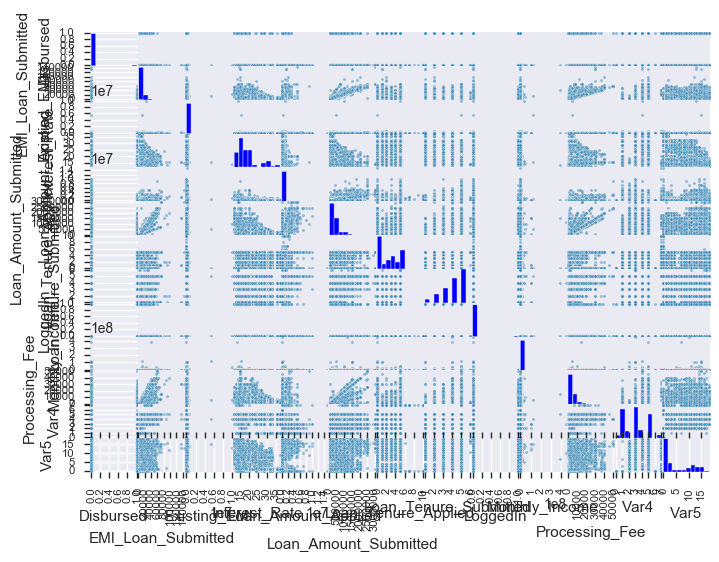

In [16]:
#Plotting scatter matrix
from pandas.tools.plotting import scatter_matrix
scatter_plot=scatter_matrix(data[num_columns])
plt.show()

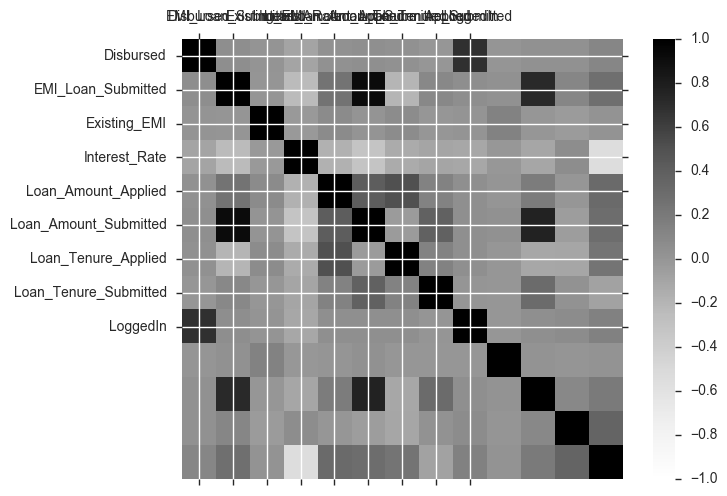

In [17]:
#Plotting correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data[num_columns])
ax.set_yticklabels(data[num_columns])
plt.show()

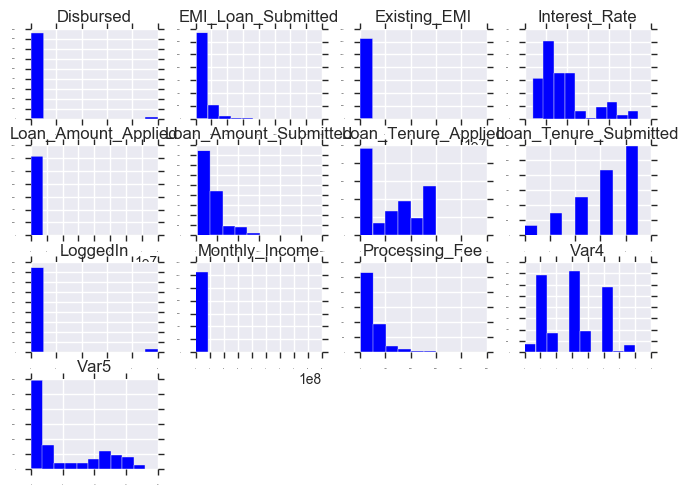

In [18]:
#Plotting univariate Histograms  -  Not required as html o/p file already provides this info
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

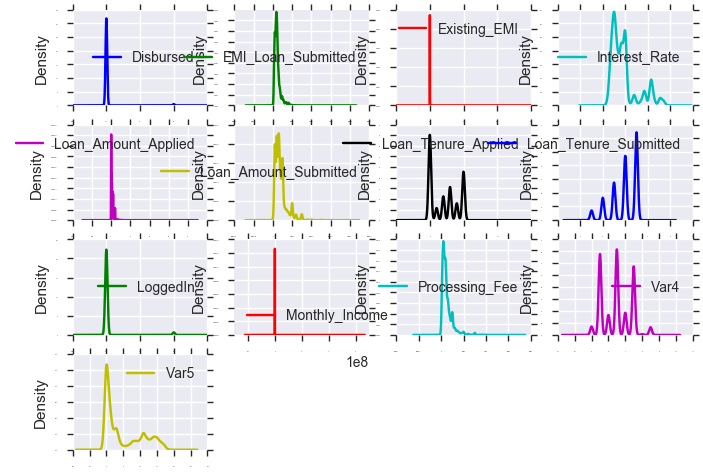

In [19]:
#Plotting univariate Density Plots  -  Not required as html o/p file already provides this info
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False,fontsize=1)
plt.show()

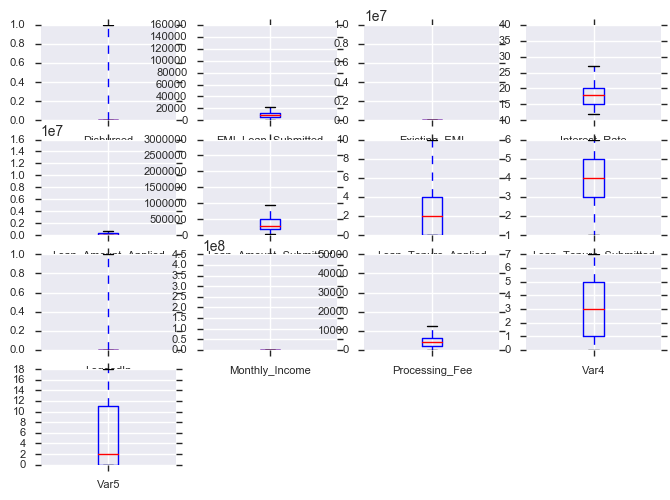

In [20]:
#Plotting box and whisker plots  -  Not required as html o/p file already provides this info
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
plt.show()

In [21]:
#Creating an indicator variable for variables with majority of values (>30%) missing 
var = ['EMI_Loan_Submitted','Interest_Rate','Processing_Fee','Loan_Amount_Submitted','Loan_Tenure_Submitted']
for v in var:
    data[v + '_Missing'] = data[v].apply(lambda x: 1 if pd.isnull(x) else 0)
    print data[[v,v + '_Missing']].head(5)
    #Later dropping the original variable
    data.drop(v,axis=1,inplace=True)

   EMI_Loan_Submitted  EMI_Loan_Submitted_Missing
0                 nan                           1
1             6,762.9                           0
2                 nan                           1
3                 nan                           1
4                 nan                           1
   Interest_Rate  Interest_Rate_Missing
0            nan                      1
1          13.25                      0
2            nan                      1
3            nan                      1
4            nan                      1
   Processing_Fee  Processing_Fee_Missing
0             nan                       1
1             nan                       1
2             nan                       1
3             nan                       1
4             nan                       1
   Loan_Amount_Submitted  Loan_Amount_Submitted_Missing
0                    nan                              1
1              200,000.0                              0
2              450,000.0                

In [22]:
#Imputing missing values with median for continuous variables
var = ['Existing_EMI','Loan_Amount_Applied','Loan_Tenure_Applied']
for v in var:
    data[v].fillna(data[v].median(),inplace=True)
data.head(5)

,City,DOB,Device_Type,Disbursed,Employer_Name,Existing_EMI,Filled_Form,Gender,ID,Lead_Creation_Date,...,Var1,Var2,Var4,Var5,source,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Processing_Fee_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing
0,Delhi,1978-05-23,Web-browser,0.0,CYBOSOL,0.0,N,Female,ID000002C20,2015-05-15,...,HBXX,G,1,0,train,1,1,1,1,1
1,Mumbai,1985-10-07,Web-browser,0.0,TATA CONSULTANCY SERVICES LTD (TCS),0.0,N,Male,ID000004E40,2015-05-04,...,HBXA,G,3,13,train,0,0,1,0,0
2,Panchkula,1981-10-10,Web-browser,0.0,ALCHEMIST HOSPITALS LTD,0.0,N,Male,ID000007H20,2015-05-19,...,HBXX,B,1,0,train,1,1,1,0,0
3,Saharsa,1987-11-30,Web-browser,0.0,BIHAR GOVERNMENT,0.0,N,Male,ID000008I30,2015-05-09,...,HBXX,B,3,10,train,1,1,1,0,0
4,Bengaluru,1984-02-17,Web-browser,0.0,GLOBAL EDGE SOFTWARE,"25,000.0",N,Male,ID000009J40,2015-05-20,...,HBXX,B,3,17,train,1,1,1,0,0


In [ ]:
#Outlier treatment if continuous variables have outliers
#df['LoanAmount_log'] = np.log(df['LoanAmount'])

In [23]:
#Dropping categorical variables that have high cardinality
var = ['City','Employer_Name','LoggedIn','Salary_Account']
for v in var:
    data.drop(v,axis=1,inplace=True)
data.columns

Index([                          u'DOB',                   u'Device_Type',
                           u'Disbursed',                  u'Existing_EMI',
                         u'Filled_Form',                        u'Gender',
                                  u'ID',            u'Lead_Creation_Date',
                 u'Loan_Amount_Applied',           u'Loan_Tenure_Applied',
                     u'Mobile_Verified',                u'Monthly_Income',
                              u'Source',                          u'Var1',
                                u'Var2',                          u'Var4',
                                u'Var5',                        u'source',
          u'EMI_Loan_Submitted_Missing',         u'Interest_Rate_Missing',
              u'Processing_Fee_Missing', u'Loan_Amount_Submitted_Missing',
       u'Loan_Tenure_Submitted_Missing'],
      dtype='object')

In [79]:
#Imputing missing values with mode for categorical variables
#var= [Mention list of variables for which you want to impute missing values with mode]
#    df.loc[:,var].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [24]:
#Dropping date variable as it doesn't appear to affect much intuitively
data.drop('Lead_Creation_Date',axis=1,inplace=True)
data.dtypes

DOB                              datetime64[ns]
Device_Type                              object
Disbursed                               float64
Existing_EMI                            float64
Filled_Form                              object
Gender                                   object
ID                                       object
Loan_Amount_Applied                     float64
Loan_Tenure_Applied                     float64
Mobile_Verified                          object
Monthly_Income                            int64
Source                                   object
Var1                                     object
Var2                                     object
Var4                                      int64
Var5                                      int64
source                                   object
EMI_Loan_Submitted_Missing                int64
Interest_Rate_Missing                     int64
Processing_Fee_Missing                    int64
Loan_Amount_Submitted_Missing           

In [24]:
#Computing age from DOB variable
# import datetime
# from datetime import date
# days_in_year = 365.2425 
# data['age'] = ((datetime.now() - data['DOB']).days/days_in_year)
# data.head(5)

# data['DOB'] = pd.to_datetime(data['DOB'])
# now = datetime.now()    
# data['age'] = now - data['dob']

#Dropping date of birth variable - To be revisited
#data.drop('DOB',axis=1,inplace=True)

In [25]:
#Reducing categories for one of the categorical variable
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
np.around((100. * data['Source'].value_counts() / len(data['Source'])),decimals=2)

S122     44.29
S133     34.39
others   21.32
Name: Source, dtype: float64

In [ ]:
#For PCA - Variable reduction refer to https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-
#analysis-python/

#For SMOTE/Oversampling/Undersampling in case of imbalanced datasets refer to Github

# import numpy as np
# from sklearn.decomposition import PCA
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import scale
# %matplotlib inline

# #Load data set
# data = pd.read_csv('sample.csv')

# #convert it to numpy arrays
# X=data.values

# #Scaling the values
# X = scale(X)

# pca = PCA(n_components=44)

# pca.fit(X)

# #The amount of variance that each PC explains
# var= pca.explained_variance_ratio_

# #Cumulative Variance explains
# var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# print var1

# plt.plot(var1)

# #Looking at above plot I'm taking 30 variables
# pca = PCA(n_components=30)
# pca.fit(X)
# X1=pca.fit_transform(X)

# print X1

In [26]:
#Checking the final list of variables in the dataset
data.dtypes

DOB                              datetime64[ns]
Device_Type                              object
Disbursed                               float64
Existing_EMI                            float64
Filled_Form                              object
Gender                                   object
ID                                       object
Loan_Amount_Applied                     float64
Loan_Tenure_Applied                     float64
Mobile_Verified                          object
Monthly_Income                            int64
Source                                   object
Var1                                     object
Var2                                     object
Var4                                      int64
Var5                                      int64
source                                   object
EMI_Loan_Submitted_Missing                int64
Interest_Rate_Missing                     int64
Processing_Fee_Missing                    int64
Loan_Amount_Submitted_Missing           

In [27]:
#Perfoming numeric coding of all categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])
data.head(5)

,DOB,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Mobile_Verified,...,Var1,Var2,Var4,Var5,source,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Processing_Fee_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing
0,1978-05-23,1,0.0,0.0,0,0,ID000002C20,"300,000.0",5.0,0,...,13,6,1,0,train,1,1,1,1,1
1,1985-10-07,1,0.0,0.0,0,1,ID000004E40,"200,000.0",2.0,1,...,8,6,3,13,train,0,0,1,0,0
2,1981-10-10,1,0.0,0.0,0,1,ID000007H20,"600,000.0",4.0,1,...,13,1,1,0,train,1,1,1,0,0
3,1987-11-30,1,0.0,0.0,0,1,ID000008I30,"1,000,000.0",5.0,1,...,13,1,3,10,train,1,1,1,0,0
4,1984-02-17,1,0.0,"25,000.0",0,1,ID000009J40,"500,000.0",2.0,1,...,13,1,3,17,train,1,1,1,0,0


In [28]:
#Perfoming one-hot encoding of all categorical variables
data = pd.get_dummies(data, columns=var_to_encode)
data.head(5)

,DOB,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,source,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,1978-05-23,0.0,0.0,ID000002C20,"300,000.0",5.0,20000,1,0,train,...,0,0,0,0,1,1,0,1,0,0
1,1985-10-07,0.0,0.0,ID000004E40,"200,000.0",2.0,35000,3,13,train,...,0,0,0,0,1,0,1,1,0,0
2,1981-10-10,0.0,0.0,ID000007H20,"600,000.0",4.0,22500,1,0,train,...,0,0,0,0,0,0,1,0,0,1
3,1987-11-30,0.0,0.0,ID000008I30,"1,000,000.0",5.0,35000,3,10,train,...,0,0,0,0,0,0,1,0,0,1
4,1984-02-17,0.0,"25,000.0",ID000009J40,"500,000.0",2.0,100000,3,17,train,...,0,0,0,0,0,0,1,0,0,1


In [29]:
#Separating train and test data again
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [30]:
if __name__ == '__main__':
    #Dropping the source -(Train/Test) variable
    train.drop('source',axis=1,inplace=True)
    test.drop(['source','Disbursed'],axis=1,inplace=True)

C:\Users\Sharath P Dandamudi\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Sharath P Dandamudi\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
#Exporting the cleansed datasets for further analysis
train.to_csv(data_path + 'train_modified.csv',index=False)
test.to_csv(data_path + 'test_modified.csv',index=False)